Code base by Wenqing Jiang  
Modified by Goh Wei Zhong

In [55]:
library(kedd)
set.seed(1234567)
path <- "."
setwd(path)
save_file <- F

#Kernel Density Estimator
k.normal <- function(u) {
  y = dnorm(u, mean = 0, sd = 1)
  return (y)
}
fhat <- function(x, X, h, kernel){
  sapply(x, function(x){
    eval(parse(text = paste0("sum(sapply(X, function(X){k.", kernel, "((X - x)/h)}))/(length(X)*h)")))
  })
}

png 
  2

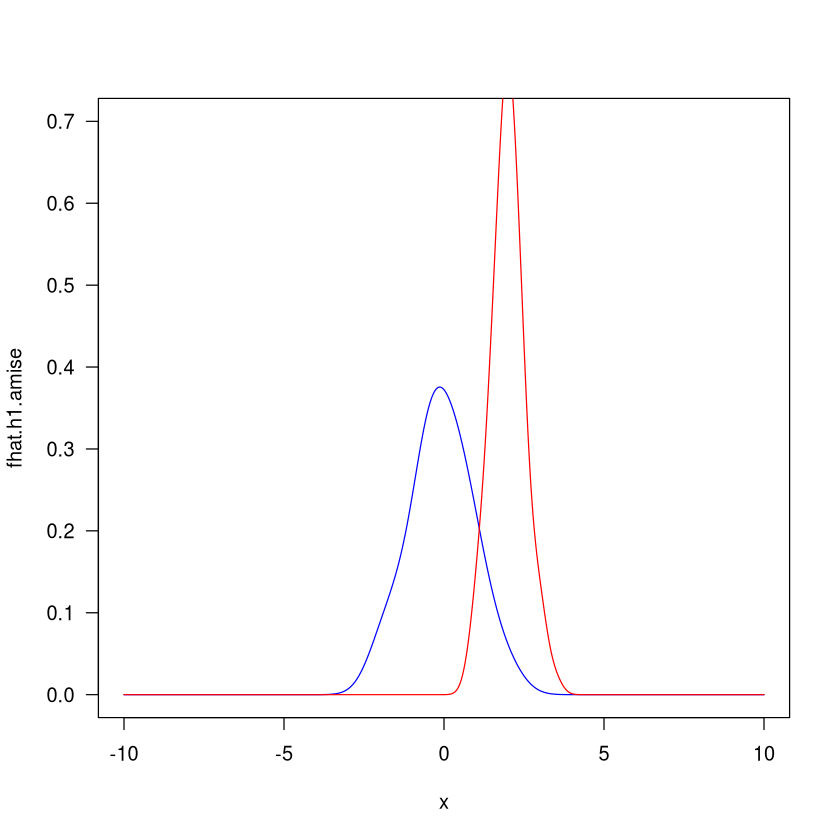

png 
  2

[1] 0.08550784

[1] 0.08551075

[1] 0.503664

[1] 0.227788

[1] 0.5

[1] 0.17

[1] 867

[1] 866

[1] 957

[1] 957

[1] 1824

[1] 1823

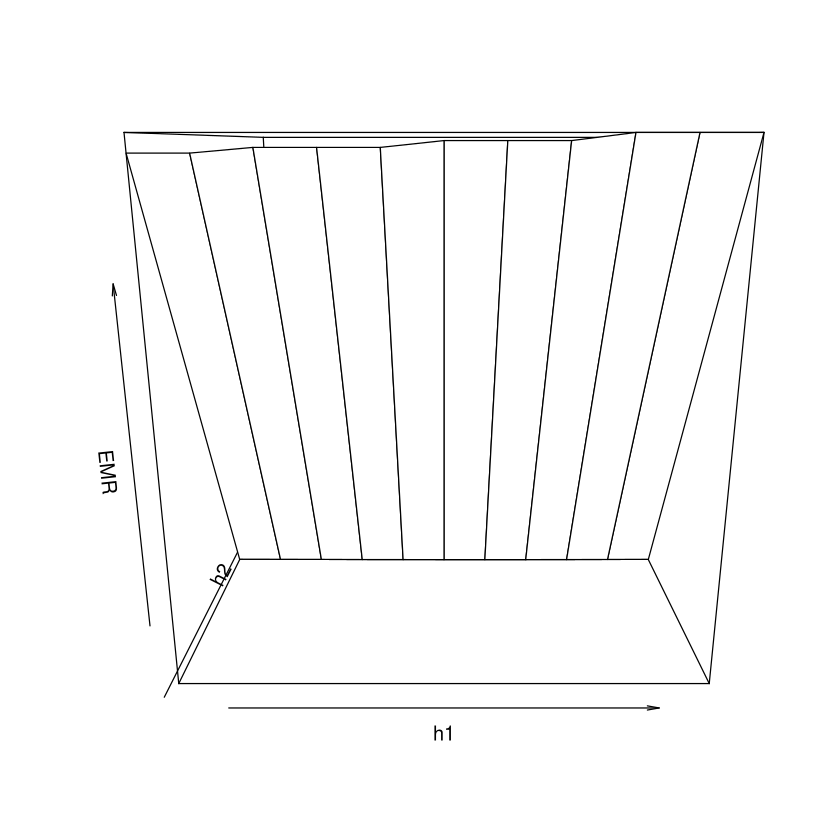

In [54]:

##Section 2 Normal Data: Estimation of Error Rates
f1.dens <- function(x) {dnorm(x, mean = 0, sd = 1)}
f2.dens <- function(x) {dnorm(x, mean = 2, sd = 0.5)}
X1 = rnorm(100, mean = 0, sd = 1)
X2 = rnorm(100, mean = 2, sd = 0.5)

##part 2a: h1 h2 that minimize the asymptotic IMSE
h1.amise = h.bcv(X1, deriv.order = 0, kernel = 'gaussian')$h
h2.amise = h.bcv(X2, deriv.order = 0, kernel = 'gaussian')$h
N = 1001
x = seq(-10, 10, length.out = N)
fhat.h1.amise = fhat(x = x, X = X1, h = h1.amise, kernel = 'normal')
fhat.h2.amise = fhat(x = x, X = X2, h = h2.amise, kernel = 'normal')
plot(x, fhat.h1.amise, type = 'l', col = 'blue', ylim = c(0, 0.7), las = 1)
lines(x, fhat.h2.amise, type = 'l', col = 'red')

##part 2b: h1 h2 that minimize the expected misclassification rate
pi.1 = 0.5
pi.2 = 0.5
N = 1001
x = seq(-10, 10, length.out = N)
dx = 20/(N-1)
h1.pool = seq(0.45, 0.55, 0.01) # ? (.50)
h2.pool = c(.1, .17, .18, .19, .22, .23, .24, .25) # .18 (.23)
emr = matrix(999, nrow = length(h1.pool), ncol = length(h2.pool))
for (i in 1:length(h1.pool)) {
  for (j in 1:length(h2.pool)) {
    h1.tmp = h1.pool[i]
    h2.tmp = h2.pool[j]
    fhat.h1.tmp = fhat(x = x, X = X1, h = h1.tmp, kernel = 'normal')
    fhat.h2.tmp = fhat(x = x, X = X2, h = h2.tmp, kernel = 'normal')
    emr.tmp = pi.1*sum(f1.dens(x[fhat.h2.tmp>fhat.h1.tmp]))*dx + pi.2*sum(f2.dens(x[fhat.h1.tmp>fhat.h2.tmp]))*dx
    emr[i,j] = emr.tmp
  }
}

if (save_file) {
  pdf(paste(path, "MA750_GroupProject-Normal.pdf", sep = "/"), height = 8.5, width = 11)
}
pdf('MA 750 Final F1 Expected classification error two normal dist.pdf', width=9, height=6)
contour(h1.pool, h2.pool, emr, xlab = "h1", ylab = "h2", main = "Expected classification error
(Two normal distributions)")
min.emr.index = which(emr == min(emr), arr.ind = TRUE)
h1.emr = h1.pool[min.emr.index[1,1]]
h2.emr = h2.pool[min.emr.index[1,2]]
points(h1.emr, h2.emr, pch=17)
points(h1.amise, h2.amise, pch=19)
dev.off()
persp(h1.pool, h2.pool, emr, xlab = "h1", ylab = "h2", zlab = "EMR")

##part 2c: compare estimates from 2a and 2b
#density curve estimates
pdf('MA 750 Final F1 Two normal dist.pdf', width=9, height=6)
plot(x, f1.dens(x), type = 'l', ylim = c(0, 1), xlab = "", ylab = "",
     main = "f1: N(0,1) & f2: N(2, 0.25)")
lines(x, f2.dens(x))
legend("topright", lty = 1, col = c("black", "red", "blue"), 
       legend = c("True distribution", "Min. error", "BCV"), bty = "n")
fhat.h1.emr = fhat(x = x, X = X1, h = h1.emr, kernel = 'normal')
fhat.h2.emr = fhat(x = x, X = X2, h = h2.emr, kernel = 'normal')
lines(x, fhat.h1.emr, col = "red")
lines(x, fhat.h2.emr, col = "red")
lines(x, fhat.h1.amise, col = "blue")
lines(x, fhat.h2.amise, col = "blue")
dev.off()
if (save_file) {
  graphics.off()
}

emr.emr = pi.1*sum(f1.dens(x[fhat.h2.emr>fhat.h1.emr]))*dx + pi.2*sum(f2.dens(x[fhat.h1.emr>fhat.h2.emr]))*dx
emr.amise = pi.1*sum(f1.dens(x[fhat.h2.amise>fhat.h1.amise]))*dx + pi.2*sum(f2.dens(x[fhat.h1.amise>fhat.h2.amise]))*dx

emr.emr
emr.amise

#misclassification rate
h1.amise
h2.amise
h1.emr
h2.emr

X1.new = rnorm(1000, mean = 0, sd = 1)
X2.new = rnorm(1000, mean = 2, sd = 0.5)

X1.emr.pred = c()
X1.amise.pred = c()
for (i in 1:length(X1.new)) {
  fhat.h1.emr.tmp = fhat(x = X1.new[i], X = X1, h = h1.emr, kernel = 'normal')
  fhat.h2.emr.tmp = fhat(x = X1.new[i], X = X2, h = h2.emr, kernel = 'normal')
  if (fhat.h1.emr.tmp > fhat.h2.emr.tmp) {
    X1.emr.pred[i] <- 1} 
  else {X1.emr.pred[i] <- 2}
  
  fhat.h1.amise.tmp = fhat(x = X1.new[i], X = X1, h = h1.amise, kernel = 'normal')
  fhat.h2.amise.tmp = fhat(x = X1.new[i], X = X2, h = h2.amise, kernel = 'normal')
  if (fhat.h1.amise.tmp > fhat.h2.amise.tmp) {
    X1.amise.pred[i] <- 1} 
  else {X1.amise.pred[i] <- 2}
}
sum(X1.emr.pred == 1)
sum(X1.amise.pred == 1)

X2.emr.pred = c()
X2.amise.pred = c()
for (i in 1:length(X2.new)) {
  fhat.h1.emr.tmp = fhat(x = X2.new[i], X = X1, h = h1.emr, kernel = 'normal')
  fhat.h2.emr.tmp = fhat(x = X2.new[i], X = X2, h = h2.emr, kernel = 'normal')
  if (fhat.h1.emr.tmp > fhat.h2.emr.tmp) {
    X2.emr.pred[i] <- 1} 
  else {X2.emr.pred[i] <- 2}
  
  fhat.h1.amise.tmp = fhat(x = X2.new[i], X = X1, h = h1.amise, kernel = 'normal')
  fhat.h2.amise.tmp = fhat(x = X2.new[i], X = X2, h = h2.amise, kernel = 'normal')
  if (fhat.h1.amise.tmp > fhat.h2.amise.tmp) {
    X2.amise.pred[i] <- 1} 
  else {X2.amise.pred[i] <- 2}
}
sum(X2.emr.pred == 2)
sum(X2.amise.pred == 2)

sum(X1.emr.pred == 1) + sum(X2.emr.pred == 2)
sum(X1.amise.pred == 1) + sum(X2.amise.pred == 2)

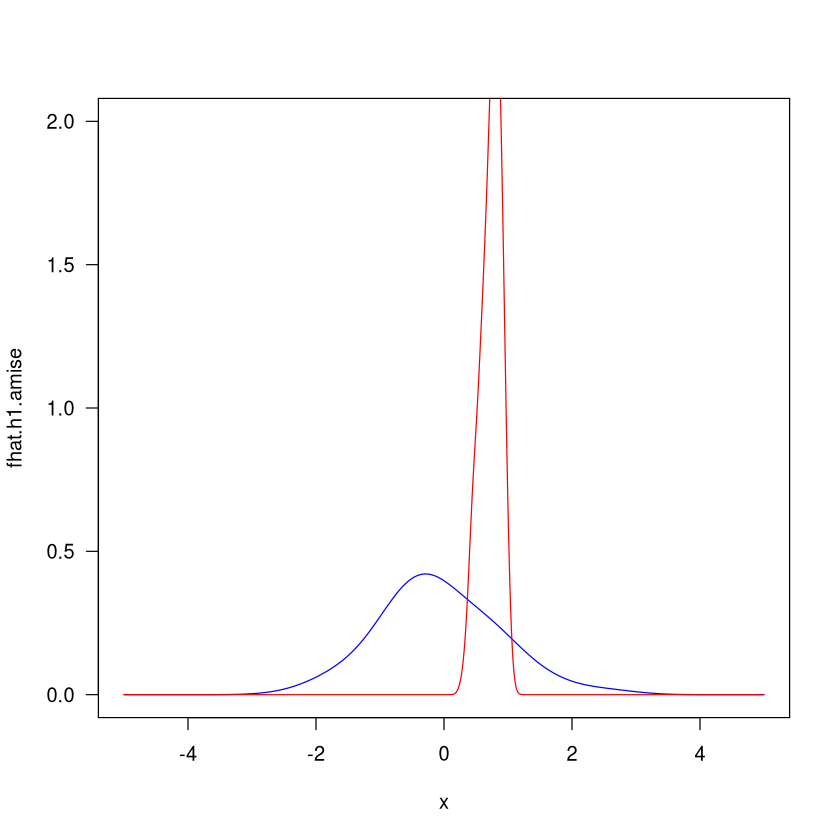

[1] 1 1
[1] 1 2
[1] 1 3
[1] 1 4
[1] 1 5
[1] 1 6
[1] 1 7
[1] 1 8
[1] 1 9
[1]  1 10
[1] 2 1
[1] 2 2
[1] 2 3
[1] 2 4
[1] 2 5
[1] 2 6
[1] 2 7
[1] 2 8
[1] 2 9
[1]  2 10
[1] 3 1
[1] 3 2
[1] 3 3
[1] 3 4
[1] 3 5
[1] 3 6
[1] 3 7
[1] 3 8
[1] 3 9
[1]  3 10
[1] 4 1
[1] 4 2
[1] 4 3
[1] 4 4
[1] 4 5
[1] 4 6
[1] 4 7
[1] 4 8
[1] 4 9
[1]  4 10
[1] 5 1
[1] 5 2
[1] 5 3
[1] 5 4
[1] 5 5
[1] 5 6
[1] 5 7
[1] 5 8
[1] 5 9
[1]  5 10
[1] 6 1
[1] 6 2
[1] 6 3
[1] 6 4
[1] 6 5
[1] 6 6
[1] 6 7
[1] 6 8
[1] 6 9
[1]  6 10
[1] 7 1
[1] 7 2
[1] 7 3
[1] 7 4
[1] 7 5
[1] 7 6
[1] 7 7
[1] 7 8
[1] 7 9
[1]  7 10
[1] 8 1
[1] 8 2
[1] 8 3
[1] 8 4
[1] 8 5
[1] 8 6
[1] 8 7
[1] 8 8
[1] 8 9
[1]  8 10


png 
  2

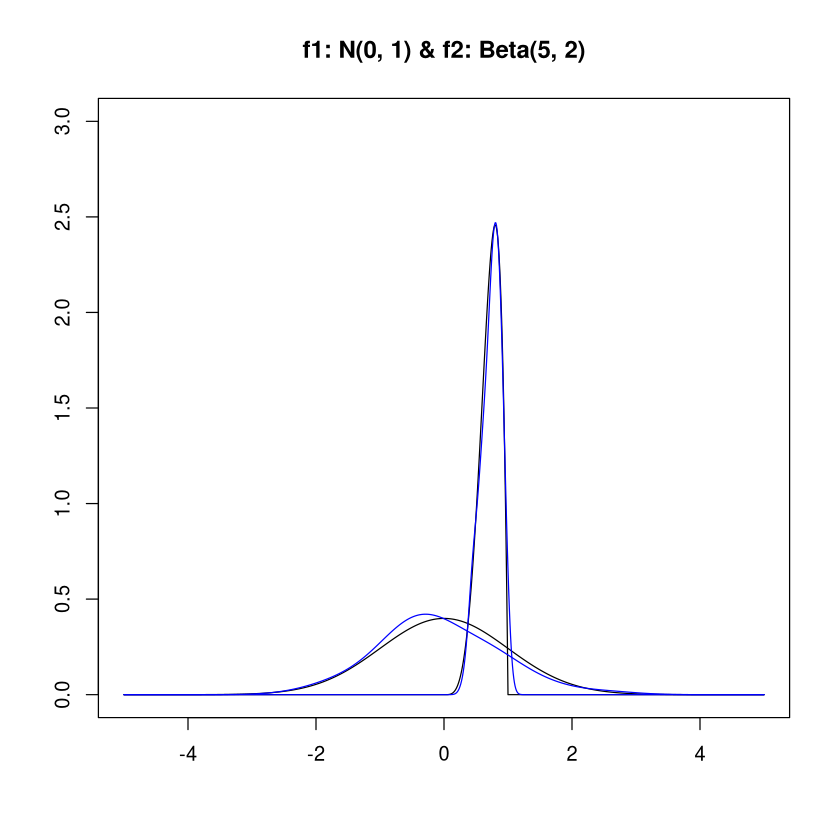

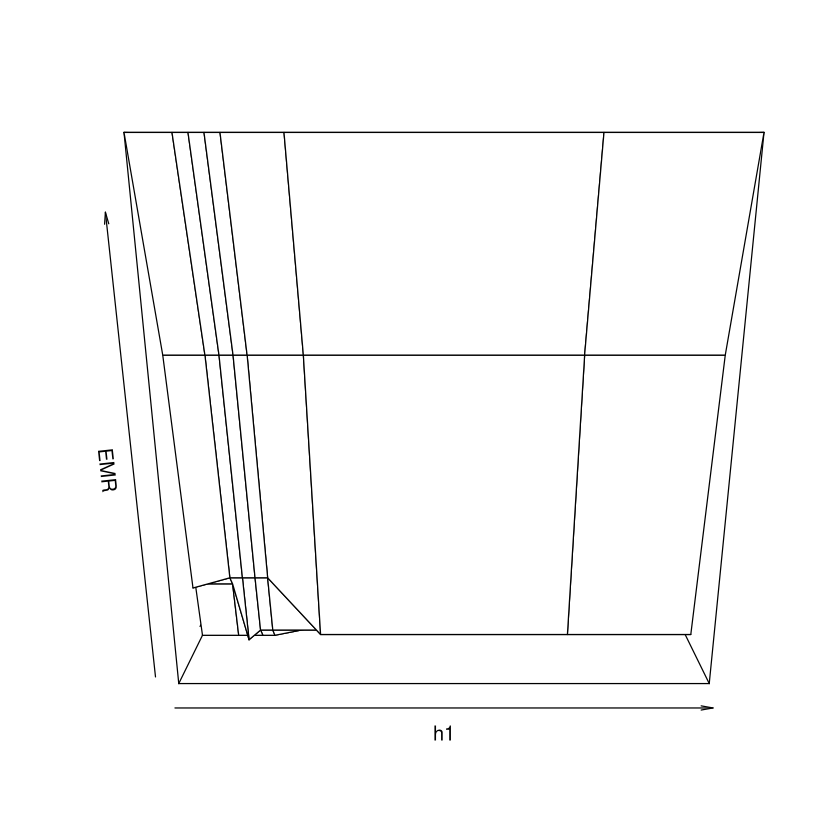

[1] 0.1135625

[1] 0.1194387

[1] 0.4613303

[1] 0.06637644

[1] 0.14

[1] 0.014

[1] 831

[1] 811

[1] 975

[1] 984

[1] 1806

[1] 1795

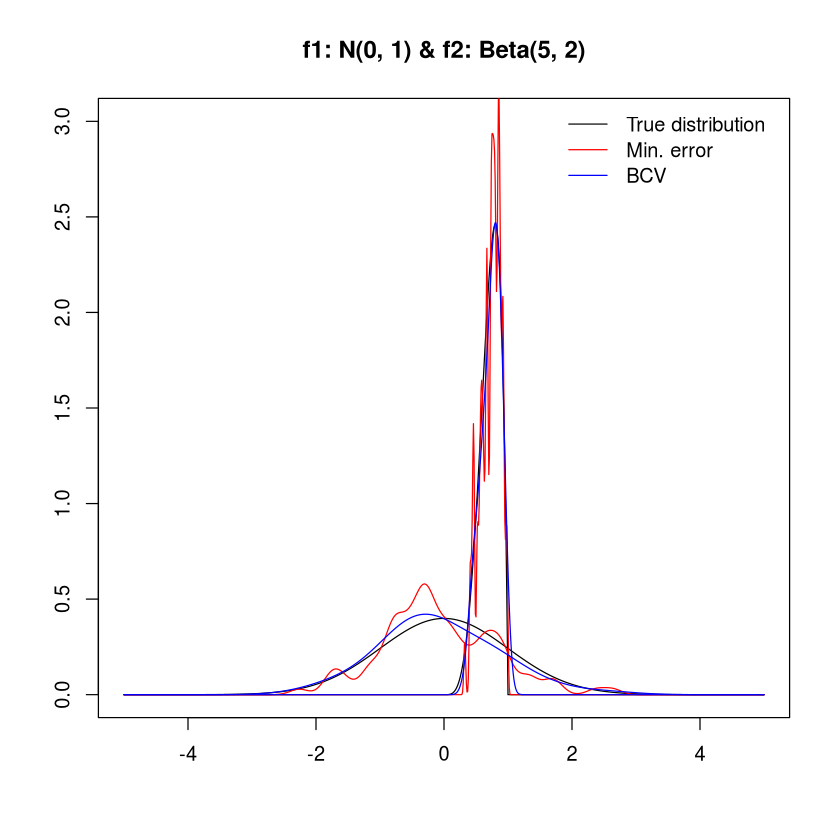

In [56]:
##Section 3 Beta Data: Estimation of Error Rates

set.seed(2019)

f1.dens <- function(x) {dnorm(x, mean = 0, sd = 1)}
f2.dens <- function(x) {dbeta(x, shape1 = 5, shape2 = 2)}
X1 = rnorm(100, mean = 0, sd = 1)
X2 = rbeta(100, shape1 = 5, shape2 = 2)

##part 3a: h1 h2 that minimize the asymptotic IMSE
h1.amise = h.bcv(X1, deriv.order = 0, kernel = 'gaussian')$h
h2.amise = h.bcv(X2, deriv.order = 0, kernel = 'gaussian')$h
N = 1001
x = seq(-5, 5, length.out = N)
fhat.h1.amise = fhat(x = x, X = X1, h = h1.amise, kernel = 'normal')
fhat.h2.amise = fhat(x = x, X = X2, h = h2.amise, kernel = 'normal')
plot(x, fhat.h1.amise, ylim = c(0, 2), type = 'l', col = 'blue', las = 1)
lines(x, fhat.h2.amise, type = 'l', col = 'red')

plot(x, f1.dens(x), type = 'l', ylim = c(0, 3), xlab = "", ylab = "",
     main = "f1: N(0, 1) & f2: Beta(5, 2)")
lines(x, f2.dens(x))
lines(x, fhat.h1.amise, col = "blue")
lines(x, fhat.h2.amise, col = "blue")


##part 3b: h1 h2 that minimize the expected misclassification rate
pi.1 = 0.5
pi.2 = 0.5
N = 1001
x = seq(-5, 5, length.out = N)
dx = 10/(N-1)
h1.pool = c(0.1, 0.13, 0.14, 0.15, 0.16, 0.2, 0.4, 0.5) # 0.14 (.46)
h2.pool = c(0.005, 0.010, 0.013, 0.014, 0.015, 0.02, 0.05, 0.06, 0.066, 0.07) # 0.014 (.066)
emr = matrix(999, nrow = length(h1.pool), ncol = length(h2.pool))
for (i in 1:length(h1.pool)) {
  for (j in 1:length(h2.pool)) {
    h1.tmp = h1.pool[i]
    h2.tmp = h2.pool[j]
    fhat.h1.tmp = fhat(x = x, X = X1, h = h1.tmp, kernel = 'normal')
    fhat.h2.tmp = fhat(x = x, X = X2, h = h2.tmp, kernel = 'normal')
    emr.tmp = pi.1*sum(f1.dens(x[fhat.h2.tmp>fhat.h1.tmp]))*dx + pi.2*sum(f2.dens(x[fhat.h1.tmp>fhat.h2.tmp]))*dx
    emr[i,j] = emr.tmp
    print (c(i,j))
  }
}
if (save_file) {
  pdf(paste(path, "MA750_GroupProject-Beta.pdf", sep = "/"), height = 8.5, width = 11)
}
pdf('MA 750 Final F4 Expected classification error overlapping dist.pdf', width=9, height=6)
contour(h1.pool, h2.pool, emr, xlab = "h1", ylab = "h2", main = "Expected classification error
(Overlapping beta and normal distribution)")
min.emr.index = which(emr == min(emr), arr.ind = TRUE)
h1.emr = h1.pool[min.emr.index[1,1]]
h2.emr = h2.pool[min.emr.index[1,2]]
points(h1.emr, h2.emr, pch=17)
points(h1.amise, h2.amise, pch=19)
points(0.11, 0.011, pch=5) # cross-validated error minimum (diamond)
points(0.11, 0.02, pch=2) # smooth cross-validated error minimum (triangle)
dev.off()
persp(h1.pool, h2.pool, emr, xlab = "h1", ylab = "h2", zlab = "EMR")

##part 3c: compare estimates from 3a and 3b
#density curve estimates
#pdf('MA 750 Final F3 Overlapping dist.pdf', width=9, height=6)
plot(x, f1.dens(x), type = 'l', ylim = c(0, 3), xlab = "", ylab = "",
     main = "f1: N(0, 1) & f2: Beta(5, 2)")
lines(x, f2.dens(x))
legend("topright", lty = 1, col = c("black", "red", "blue"), 
       legend = c("True distribution", "Min. error", "BCV"), bty = "n")
fhat.h1.emr = fhat(x = x, X = X1, h = h1.emr, kernel = 'normal')
fhat.h2.emr = fhat(x = x, X = X2, h = h2.emr, kernel = 'normal')
lines(x, fhat.h1.emr, col = "red")
lines(x, fhat.h2.emr, col = "red")
lines(x, fhat.h1.amise, col = "blue")
lines(x, fhat.h2.amise, col = "blue")
#dev.off()
if (save_file) {
  graphics.off()
}

emr.emr = pi.1*sum(f1.dens(x[fhat.h2.emr>fhat.h1.emr]))*dx + pi.2*sum(f2.dens(x[fhat.h1.emr>fhat.h2.emr]))*dx
emr.amise = pi.1*sum(f1.dens(x[fhat.h2.amise>fhat.h1.amise]))*dx + pi.2*sum(f2.dens(x[fhat.h1.amise>fhat.h2.amise]))*dx

emr.emr
emr.amise

#misclassification rate
h1.amise
h2.amise
h1.emr
h2.emr

X1.new = rnorm(1000, mean = 0, sd = 1)
X2.new = rbeta(1000, shape1 = 5, shape2 = 2)

X1.emr.pred = c()
X1.amise.pred = c()
for (i in 1:length(X1.new)) {
  fhat.h1.emr.tmp = fhat(x = X1.new[i], X = X1, h = h1.emr, kernel = 'normal')
  fhat.h2.emr.tmp = fhat(x = X1.new[i], X = X2, h = h2.emr, kernel = 'normal')
  if (fhat.h1.emr.tmp > fhat.h2.emr.tmp) {
    X1.emr.pred[i] <- 1} 
  else {X1.emr.pred[i] <- 2}
  
  fhat.h1.amise.tmp = fhat(x = X1.new[i], X = X1, h = h1.amise, kernel = 'normal')
  fhat.h2.amise.tmp = fhat(x = X1.new[i], X = X2, h = h2.amise, kernel = 'normal')
  if (fhat.h1.amise.tmp > fhat.h2.amise.tmp) {
    X1.amise.pred[i] <- 1} 
  else {X1.amise.pred[i] <- 2}
}
sum(X1.emr.pred == 1)
sum(X1.amise.pred == 1)

X2.emr.pred = c()
X2.amise.pred = c()
for (i in 1:length(X2.new)) {
  fhat.h1.emr.tmp = fhat(x = X2.new[i], X = X1, h = h1.emr, kernel = 'normal')
  fhat.h2.emr.tmp = fhat(x = X2.new[i], X = X2, h = h2.emr, kernel = 'normal')
  if (fhat.h1.emr.tmp > fhat.h2.emr.tmp) {
    X2.emr.pred[i] <- 1} 
  else {X2.emr.pred[i] <- 2}
  
  fhat.h1.amise.tmp = fhat(x = X2.new[i], X = X1, h = h1.amise, kernel = 'normal')
  fhat.h2.amise.tmp = fhat(x = X2.new[i], X = X2, h = h2.amise, kernel = 'normal')
  if (fhat.h1.amise.tmp > fhat.h2.amise.tmp) {
    X2.amise.pred[i] <- 1} 
  else {X2.amise.pred[i] <- 2}
}
sum(X2.emr.pred == 2)
sum(X2.amise.pred == 2)

sum(X1.emr.pred == 1) + sum(X2.emr.pred == 2)
sum(X1.amise.pred == 1) + sum(X2.amise.pred == 2)

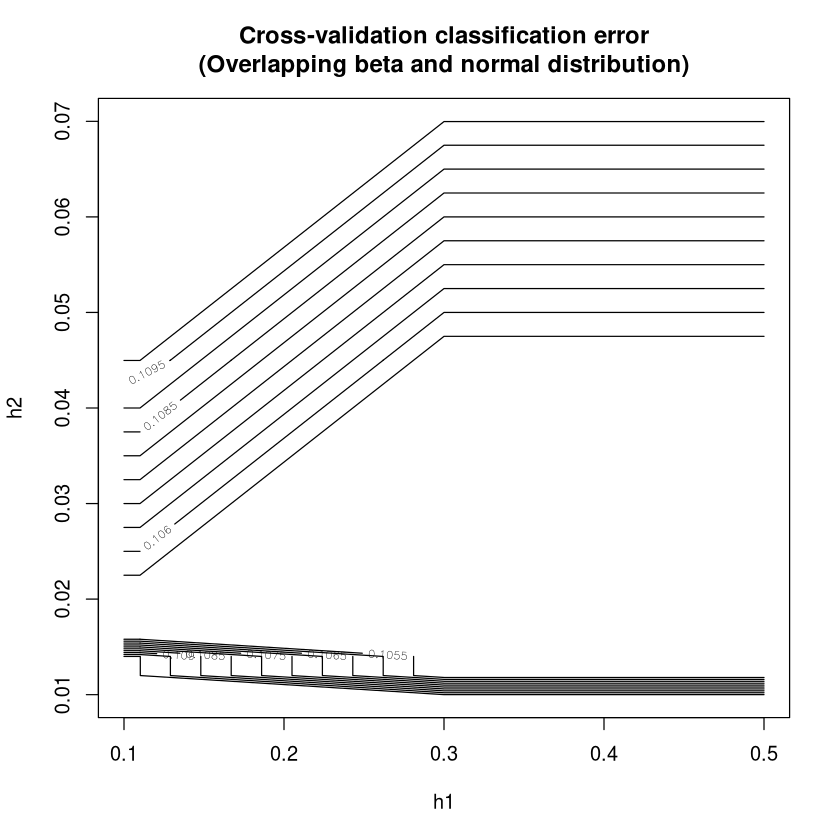

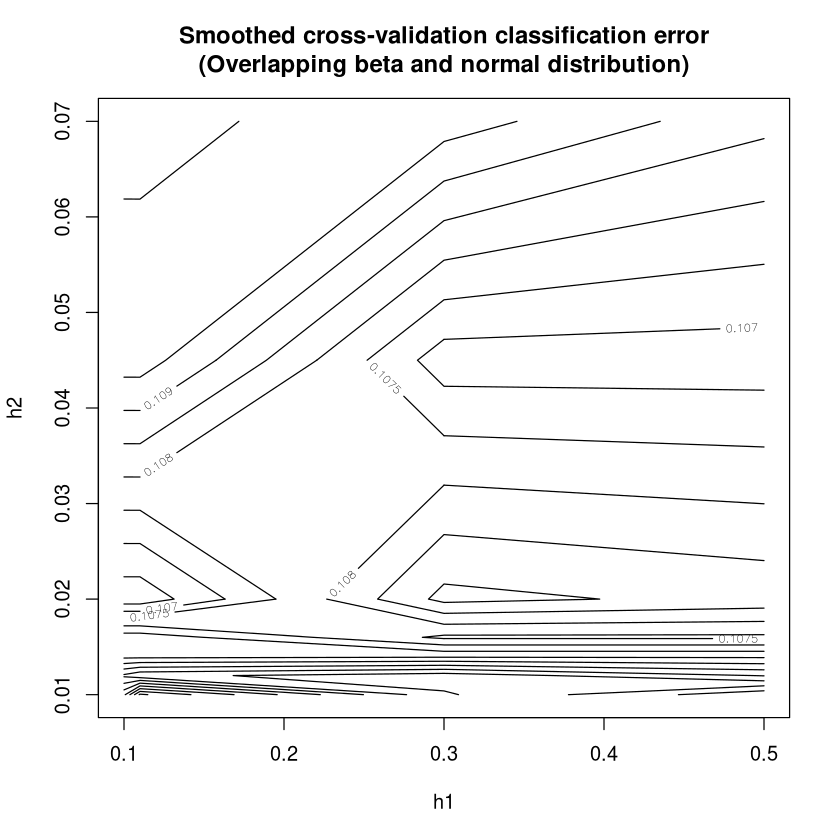

In [45]:
# iterative search - fine grid search is computationally intensive
h1.pool = c(0.10, 0.11, 0.3, 0.5) #c(0.10, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.2, 0.4, 0.5) # 0.14 (.46)
h2.pool = c(0.01, 0.012, 0.014, 0.016, 0.02, 0.045, 0.07)#, 0.014- 0.1088525, 0.02 - 0.1061646, 0.03, 0.05, 0.07) #c(0.005, 0.010, 0.011, 0.012, 0.013, 0.014, 0.015, 0.02, 0.05, 0.06, 0.066, 0.07) # 0.014 (.066)
cvmr = matrix(999, nrow = length(h1.pool), ncol = length(h2.pool))
scvmr = matrix(999, nrow = length(h1.pool), ncol = length(h2.pool))
xs = seq(-3, 3, 0.01)
for (i in 1:length(h1.pool)) {
  for (j in 1:length(h2.pool)) {
    h1.tmp = h1.pool[i]
    h2.tmp = h2.pool[j]
    dk_f1 = fhat(X2, X1, h = h1.tmp, kernel = "normal")
    dk_f2 = fhat(X1, X2, h = h2.tmp, kernel = "normal")
    dk_f1_i = sapply(1:length(X1), function(k){
    fhat(X1[k], X1[-k], h = h1.tmp, kernel = "normal")
    })
    dk_f2_i = sapply(1:length(X2), function(k){
    fhat(X2[k], X2[-k], h = h2.tmp, kernel = "normal")
    })
    cvmr[i,j] = (sum(dk_f2 > dk_f1_i) + sum(dk_f1 > dk_f2_i))/length(c(X1, X2))
    dk_f1 <- fhat(xs, X1, h = h1.tmp, kernel = "normal")
    dk_f2 <- fhat(xs, X2, h = h2.tmp, kernel = "normal")
    scvmr[i,j] = 0.5*(mean(sapply(X1, function(x1_i){
      dk_f1_i <- fhat(xs, X1[-which(X1 == x1_i)], h = h1.tmp, kernel = "normal")
      sum(dnorm((xs[dk_f2 > dk_f1_i] - x1_i)/0.01)*(0.01))
    })))/0.01 +
      0.5*(mean(sapply(X2, function(x2_i){
        dk_f2_i <- fhat(xs, X2[-which(X2 == x2_i)], h = h2.tmp, kernel = "normal")
        sum(dnorm((xs[dk_f1 > dk_f2_i] - x2_i)/0.01)*(0.01))
      })))/0.01
  }
}

min.cvmr.index = which(cvmr == min(cvmr), arr.ind = TRUE)
h1.cvmr = h1.pool[min.cvmr.index[1,1]] # 0.11
h2.cvmr = h2.pool[min.cvmr.index[1,2]] # 0.011

min.scvmr.index = which(scvmr == min(scvmr), arr.ind = TRUE)
h1.scvmr = h1.pool[min.scvmr.index[1,1]] # 0.11
h2.scvmr = h2.pool[min.scvmr.index[1,2]] # 0.02

contour(h1.pool, h2.pool, cvmr, xlab = "h1", ylab = "h2", main = "Cross-validation classification error
(Overlapping beta and normal distribution)")
contour(h1.pool, h2.pool, scvmr, xlab = "h1", ylab = "h2", main = "Smoothed cross-validation classification error
(Overlapping beta and normal distribution)")

In [53]:
pdf('MA 750 Final F5 Smoothed cross-validation.pdf', width=9, height=6)
contour(h1.pool, h2.pool, scvmr, xlab = "h1", ylab = "h2", main = "Smoothed cross-validation classification error
(Overlapping beta and normal distribution)")
points(0.14, 0.014, pch=17)
points(0.461330298085335, 0.0663764441920194, pch=19)
points(0.11, 0.011, pch=5) # cross-validated error minimum (diamond)
points(0.11, 0.02, pch=2) # smooth cross-validated error minimum (triangle)
dev.off()

png 
  2

In [50]:
N = 1001
x = seq(-5, 5, length.out = N)
dx = 10/(N-1)
fhat.h1 = fhat(x = x, X = X1, h = 0.11, kernel = 'normal')
fhat.h2 = fhat(x = x, X = X2, h = 0.020, kernel = 'normal')
emr.tmp = 0.5*sum(f1.dens(x[fhat.h2>fhat.h1]))*dx + 0.5*sum(f2.dens(x[fhat.h1>fhat.h2]))*dx
emr.tmp

[1] 0.1147603